In [1]:
#データセットの用意
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#データセットの確認
print(X_train.shape)
print(X_test.shape)
print(X_test[0].dtype)
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
#reshape
test = X_train[0]
print(test.shape)
test = test.reshape(-1, 1)
print(test.shape)

(28, 28)
(784, 1)


In [4]:
#reshape
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2])

5


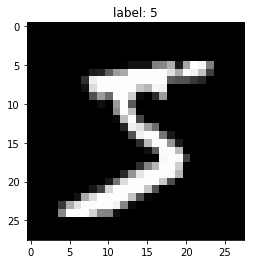

In [5]:
#画像データの可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28, 28)
print(y_train[index])
#X_train[index]: (784,)
#image: (28, 28)
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title("label: %s" % (y_train[index]))
plt.show()

In [6]:
#前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())

1.0
0.0


In [7]:
#split into train, val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) 
print(X_val.shape) 

(48000, 784)
(12000, 784)


## 【問題1】ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成してください。

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/scratch_simple_neural_network.py)

## 【問題2】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。



In [8]:
import sys

string = "/Users/ohmori/diveintocode-ml/diveintocode-term2/ml-scratch/model"
if string not in sys.path:
        sys.path.append(string)

In [9]:
from scratch_simple_neural_network import ScratchSimpleNeuralNetrowkClassifier

In [11]:
#fit & predict
snnc = ScratchSimpleNeuralNetrowkClassifier(
        verbose=True,
        batch_size=10,
        node_size_list=[400, 200, 10],
        activator='sigmoid',
        lr=0.01,
        n_epochs=30,
        sigma=0.1
)

cost = snnc.fit(X_train, y_train, X_test, y_test)
pred = snnc.predict(X_test)

print(y_test)
print(pred)
print(y_test == pred)
print((y_test == pred).sum()/len(y_test))



new layer generated! 1
new layer generated! 2
new layer generated! 3
epoch:  0
process time:  17.400491952896118 sec
epoch:  1
process time:  33.147411823272705 sec
epoch:  2
process time:  53.98810386657715 sec
epoch:  3
process time:  69.76626706123352 sec
epoch:  4
process time:  85.48542404174805 sec
epoch:  5
process time:  101.1542649269104 sec
epoch:  6
process time:  116.88666200637817 sec
epoch:  7
process time:  132.6611680984497 sec
epoch:  8
process time:  148.36563181877136 sec
epoch:  9
process time:  164.05882596969604 sec
epoch:  10
process time:  181.29904794692993 sec
epoch:  11
process time:  199.16365575790405 sec
epoch:  12
process time:  216.49127006530762 sec
epoch:  13
process time:  241.0640528202057 sec
epoch:  14
process time:  262.1697630882263 sec
epoch:  15
process time:  281.99365496635437 sec
epoch:  16
process time:  297.9973518848419 sec
epoch:  17
process time:  313.6207139492035 sec
epoch:  18
process time:  329.25474977493286 sec
epoch:  19
process 

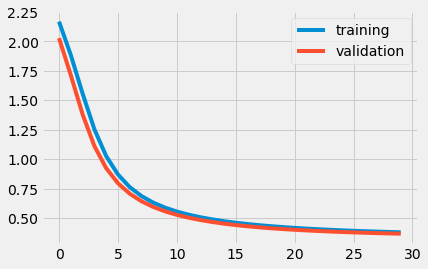

In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(np.arange(len(cost["training"])), cost["training"], label="training")
plt.plot(np.arange(len(cost["validation"])), cost["validation"], label="validation")
plt.legend();

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#predictの評価の表示
def show_evaluation(y_test, pred):
    print("----------------------------------------")
    print("Accuracy: ", accuracy_score(y_test, pred))
    print("Precision: ", precision_score(y_test, pred, average='micro'))
    print("Recall: ", recall_score(y_test, pred, average='micro'))
    print("f1 : ", f1_score(y_test, pred, average='micro'))
    print("----------------------------------------")

In [14]:
show_evaluation(y_test, pred.reshape(-1,))

----------------------------------------
Accuracy:  0.8963
Precision:  0.8963
Recall:  0.8963
f1 :  0.8963
----------------------------------------


## （オプション）誤分類の確認
誤分類した画像はどのようなものだったかを見てみましょう。推定値を用意し、以下のコードを実行してください。

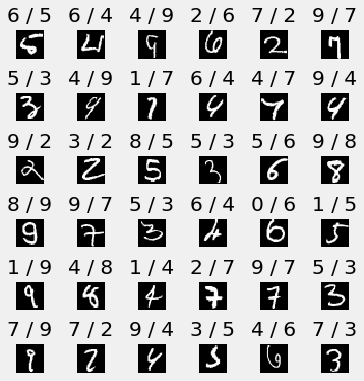

In [15]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

true_false = pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')